In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [3]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [4]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [5]:
# テーブル train の欠損データ数
print("N/A count of train:")
print(train.isna().sum())

N/A count of train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# テーブル test の欠損データ数
print("N/A count of test:")
print(test.isna().sum())

N/A count of test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# 削除する列
removal_columns = ["PassengerId", "Name", "Ticket"]

# 質的データとして扱う列
categorical_features = ["Pclass", "Sex", "Cabin", "Embarked"]

# 学習に用いない列を消す
train = train.drop(removal_columns, axis=1)
test = test.drop(removal_columns, axis=1)

# categorical_features に当たる列は質的データとして扱う
for feature in categorical_features:
    train[feature] = train[feature].astype("category")
    test[feature] = test[feature].astype("category")

display(train)
display(test)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [8]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score

X = train.drop("Survived", axis=1)
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1)

model = lgb.LGBMClassifier(
    random_state=3,
    boosting_type="gbdt",
    data_sample_strategy="goss",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    num_leaves=5,
    min_child_samples=2,
    force_row_wise=True,
)

model.fit(
    X_train,
    y_train,
    callbacks=[lgb.early_stopping(30)],
    eval_set=[(X_test, y_test), (X_train, y_train)],
)

y_pred = model.predict(X_test)

[LightGBM] [Info] Number of positive: 305, number of negative: 496
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 8
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380774 -> initscore=-0.486264
[LightGBM] [Info] Start training from score -0.486264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[58]	training's binary_logloss: 0.388198	valid_0's binary_logloss: 0.480665


Accuracy: 0.7666666666666667
F1: 0.676923076923077
AUC: 0.7406935237123917


<Axes: >

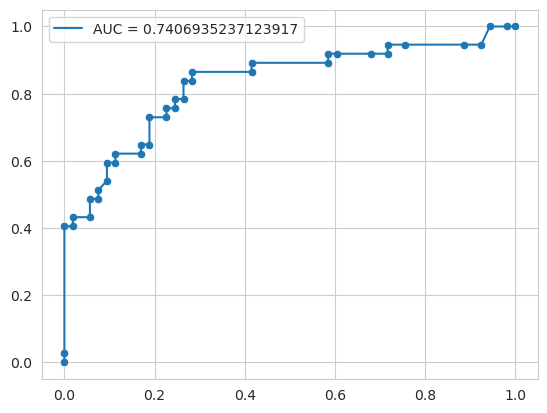

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)  # type: ignore
f1 = f1_score(y_test, y_pred)  # type: ignore
auc = roc_auc_score(y_test, y_pred)  # type: ignore

print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print(f"AUC: {auc}")

# Render ROC Curve
prob = model.predict_proba(X_test)[:, 1]  # type: ignore
fpr, tpr, threshold = roc_curve(y_test, prob)  # type: ignore

sns.lineplot(x=fpr, y=tpr, label=f"AUC = {auc}", estimator=None) # type: ignore
sns.scatterplot(x=fpr, y=tpr)